In [1]:
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=23.6, repr.plot.height=9.1, repr.plot.res=300)

In [3]:
library(ggplot2)

pdf 
  2

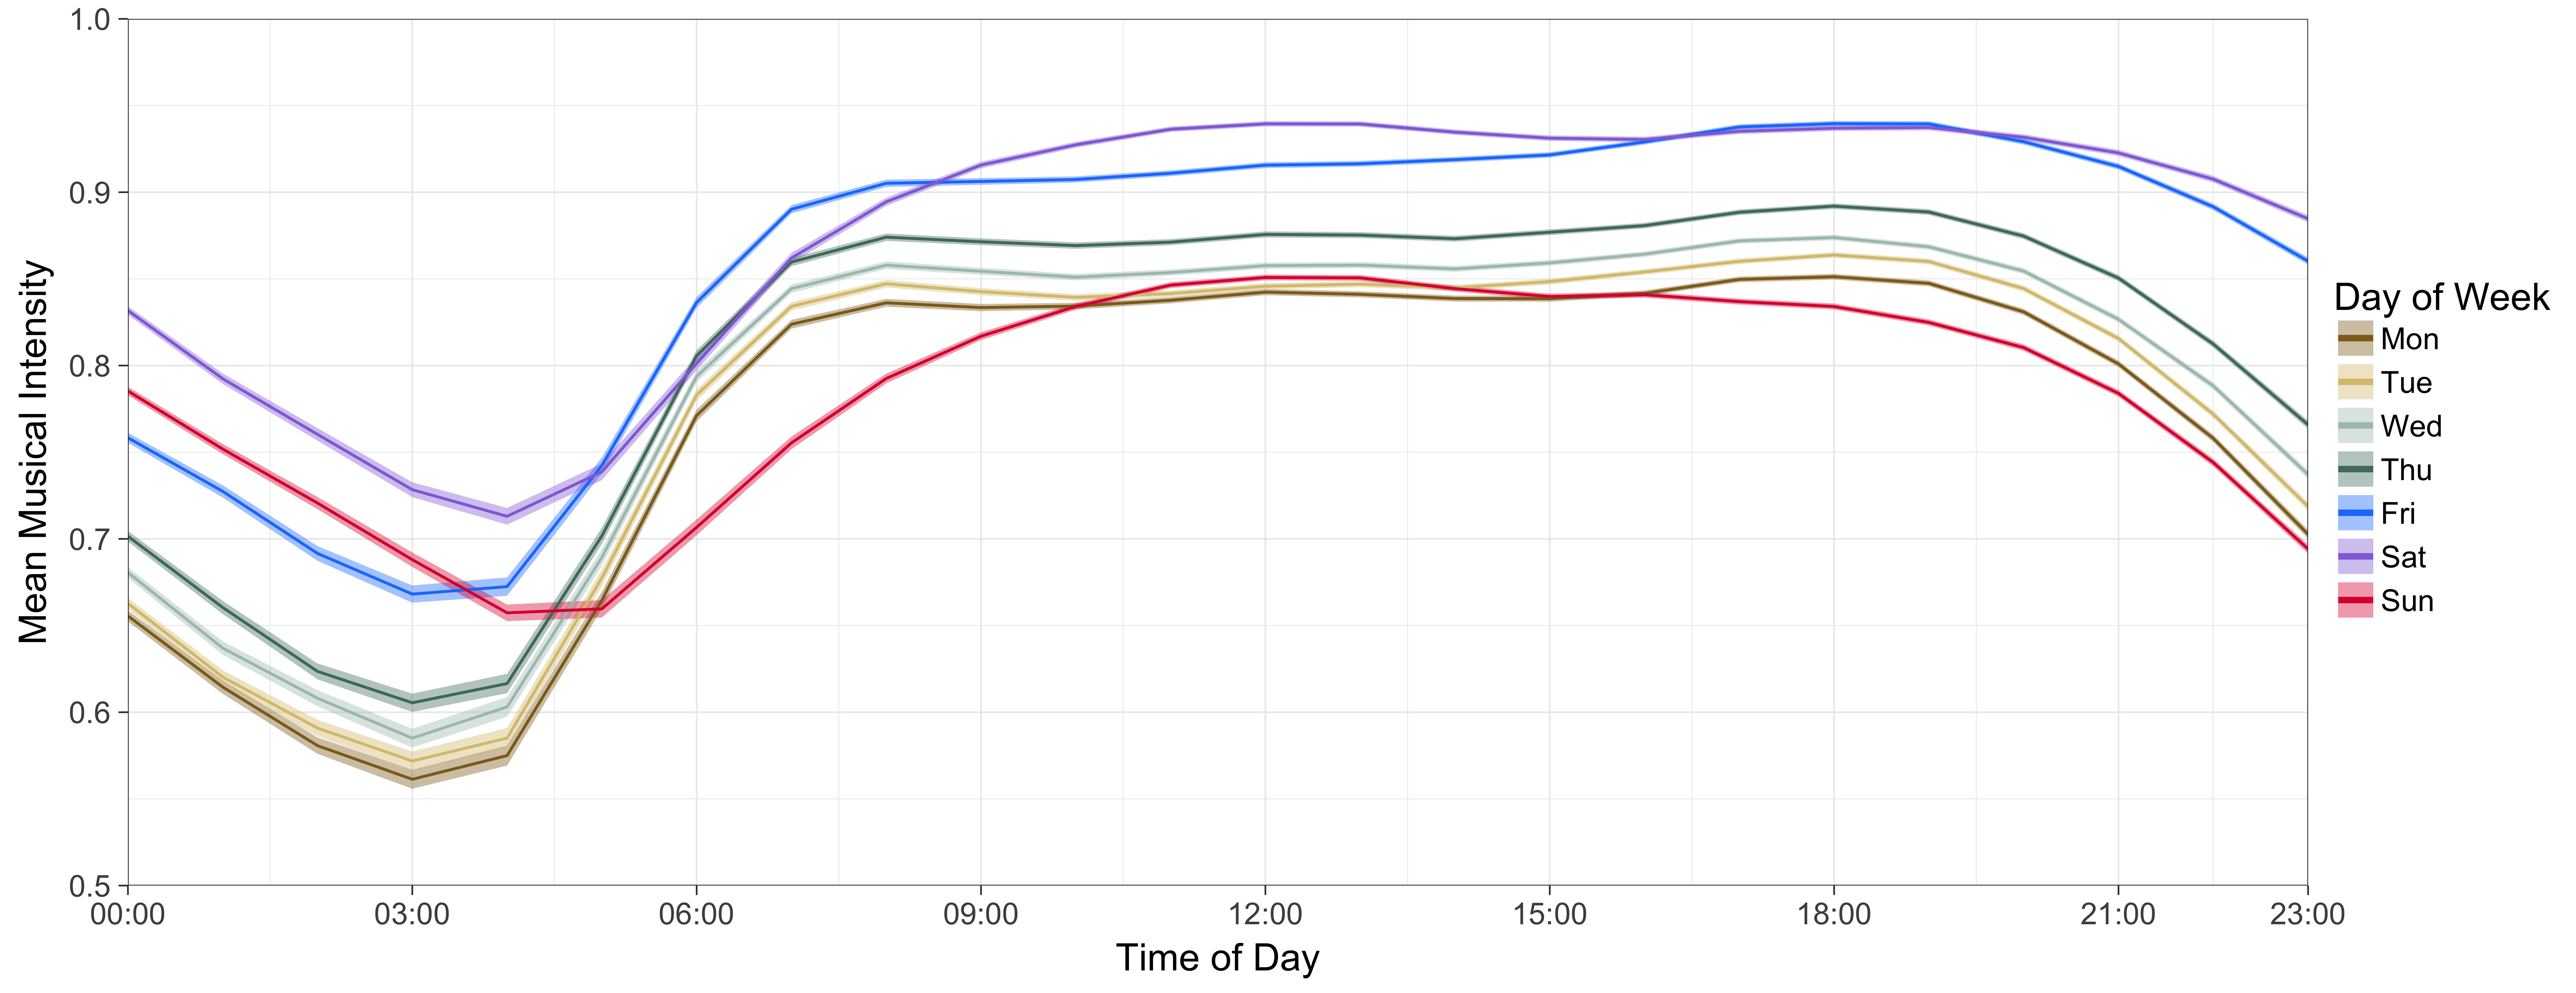

In [4]:
tmp <- read.csv("../data/intensity/hour_dow.csv", header=TRUE)
tmp$dow <- factor(tmp$dow,
                      levels = c("Mon","Tue", "Wed", "Thu", "Fri", "Sat", "Sun"),
                      ordered = TRUE)

my.cols <- c("#8d6b20","#d9c37d","#aac3bb","#4e7a6c","#1c7ffe","#9370db","#dc143c")

p_dow <- ggplot(tmp, aes(x=hours, y=within_variation, group=dow)) + 
  geom_ribbon(aes(ymin=within_variation-ci, ymax=within_variation+ci, fill=dow), linetype=2, alpha=0.4) +
  scale_fill_manual(values=my.cols) +
  geom_line(aes(color=dow, group=dow), size=0.9) +
  scale_color_manual(values=my.cols) +
  labs(x="Time of Day", y="Mean Musical Intensity", color="Day of Week", fill="Day of Week") +
  scale_y_continuous(limits=c(0.5,1.0), expand=c(0,0), breaks=seq(0.5,1.0,0.1),
                     labels=c(seq(0.5,0.9,0.1),"1.0")) +
  scale_x_continuous(limits=c(0,23), expand=c(0,0), breaks=c(0,3,6,9,12,15,18,21,23),
                     labels=c("00:00", "03:00", "06:00", "09:00", "12:00", "15:00", "18:00", "21:00", "23:00")) +
  theme_bw(base_size=25) +
  theme(legend.key.size=unit(2, "lines"),
        legend.background=element_rect(fill=alpha("white", 0))) +
  guides(color=guide_legend(override.aes=list(size=2)))

p_dow

pdf(file="../output/fig1.pdf", width=23.6, height=9.1)
print(p_dow)
dev.off()